**Imports**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy

**Neuron with Sigmoid Activation**

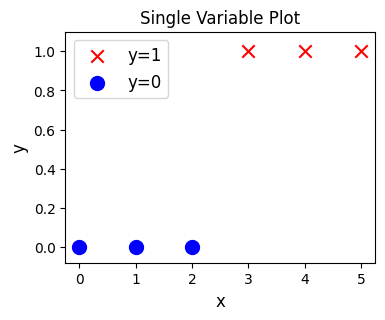

In [8]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)

positives = Y_train == 1
negatives = Y_train == 0

fig,ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter(X_train[positives], Y_train[positives], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X_train[negatives], Y_train[negatives], marker='o', s=100, c = 'blue', label="y=0")

ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('Single Variable Plot')
ax.legend(fontsize=12)
plt.show()

In [ ]:
model = Sequential([tf.keras.layers.Dense(1, input_dim = 1, activation = 'sigmoid', name = 'L1')])
model.summary()

c:\Users\tjawo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
logistic_layer = model.get_layer('L1')
w, b = logistic_layer.get_weights()

# set weights and biases to known values
set_w = np.array([[2]])
set_b = np.array([-4.5])
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())


[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


## Building a Neural Network ##
- normalize_data = tf.keras.layers.normaization(axis=-1) -> normalize_data.adapt(input) #learns mean and vaiance -> X_norm = normaize_data(X_original) 
<br><br>
- Sequential([layer1, layer2]) tells tensorflow to string layer 1 and layer 2 together to create a neural network
- **model.compile(loss = ,optimizer = )** defines a loss function and specifies a compile optimization
- **model.fit(X_train, Y_train, epochs)** runs gradient descent and fits the weights to the data
- **model.predict(x_new)** carries out inference using the compiled neural network


Dense Function
- **inputs:** activation from previous layer and parameters w, b for a the given layer
- **outputs:** activation from current layer

In [ ]:
# sample skeleton for a dense layer
def dense(a_in, W, b):
    units = W.shape[1]
    a_out = np.zeros(units)

    for j in range(units):
        w = W[:,j]
        z = np.fot(w, a_in) + b[j]
        a_out[j] = sigmoid(z)
    return a_out

In [ ]:
# sample skeleton for a MLP
def sequential(x):
    a1 = dense(x, W1 ,b1)
    a2 = dense(a1, W2, b2)
    a3 = dense(a2, W3, b3)
    a4 = dense(a3, W4, b4)
    f_x = a4

    return f_x

**Number Recognition NN**

In [ ]:
X, y = load_data() # we would actually load the 1000 training examples here, each a 20x20 grid unrolled into a 400-dimensional vector

In [ ]:
model = Sequential(
    [
        tf.keras.Input(shape = (400,))
        layers.Dense(25, activation = 'sigmoid'),
        layers.Dense(15, activation = 'sigmoid'),
        layers.Dense(1, activation = 'sigmoid')
    ], name = 'my_model'
)

In [ ]:
L1_num_params = 400 * 25 + 25 # W1 and b1 parameters
L2_num_params = 25 * 15 + 15   # W2 and b2 parameters
L3_num_params = 15 * 1 + 1     # W3 and b3 parameters
print("L1 params = ", L1_num_params, ", L2 params = ", L2_num_params, ",  L3 params = ", L3_num_params )

In [ ]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizer.Adam(0.001)
)

model.fit(X, y, epochs = 20)

In [ ]:

z = np.matmul(np.transpose(a_in), W) + b
a_out = sigmoid(z)